In [ ]:
"""
    First basic livetracking graph.
    Consist of motor, sensor and ultrasound values
"""

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd

plt.ion()

while True:
    data = pd.read_csv("output.csv")
    
    left_motor = data['left motor'].values
    left_motor_norm = left_motor / 1000
    right_motor = data['right motor'].values
    right_motor_norm = right_motor / 1000
    total_motor_norm = (left_motor+right_motor) / 1000
    
    left_sensor = data['left sensor'].values
    right_sensor = data['right sensor'].values
    total_sensor = left_sensor + right_sensor
    
    left_us_sensor = data['left ultrasound sensor'].values
    right_us_sensor = data['right ultrasound sensor'].values
    sensor = data['left sensor'].values + data['right sensor'].values

    plt.plot(left_sensor)
    plt.plot(right_sensor)
    plt.axis('tight')
    plt.legend(['left_motor_norm','right_motor_norm','left_sensor','right_sensor','left motor','right motor'])

    clear_output(wait=True)
    plt.pause(1)

while True:
    clear_output(wait=True)
    plt.pause(1)



In [ ]:
"""
    Livetracking of a heatmap of a normalized motor, sensor and ultrasound values.
"""

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
while True:
    plt.figure(figsize=(10,10))
    data = pd.read_csv("output.csv")

    data['right motor'] = data['right motor'].values/1000
    data['left motor'] = data['left motor'].values/1000

    im = plt.imshow(data,cmap='hot',aspect='auto')
    plt.colorbar(im,orientation='horizontal')
    
    clear_output(wait=True)
    plt.pause(1)


while True:
    clear_output(wait=True)
    plt.pause(1)


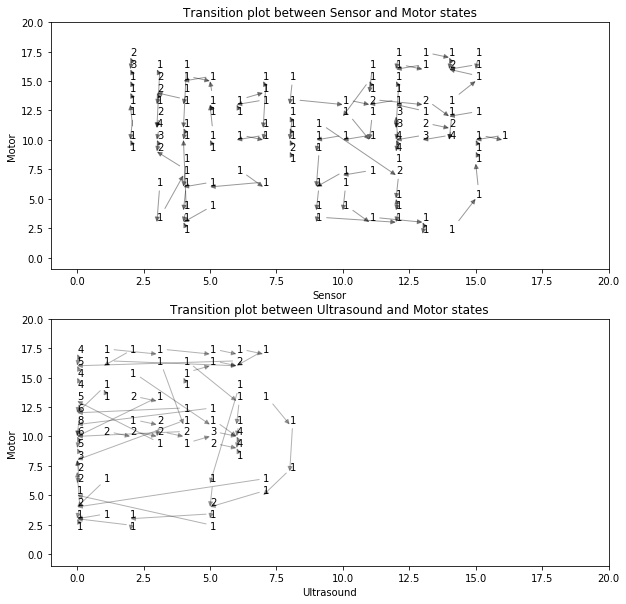

In [ ]:
"""
    State transition between bins
"""

from DataManipulation import DataManipulation
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections
import pandas as pd
import networkx as nx
from IPython.display import clear_output

plt.ion()

# Print the whole array rather than just a subset of the array
np.set_printoptions(threshold=np.nan,suppress=True)

# Necessary for livetracking
while True:
    grid = plt.figure(figsize=(10,10))
    #Add position for the plot with 211 being 2 row 1 column and position 1
    ls = grid.add_subplot(211)
    plt.title("Transition plot between Sensor and Motor states")
    plt.xlabel("Sensor")
    plt.ylabel("Motor")
    rs = grid.add_subplot(212)
    plt.title("Transition plot between Ultrasound and Motor states")
    plt.xlabel("Ultrasound")
    plt.ylabel("Motor")
    
    # Reading output.csv and normalizing the data
    data = DataManipulation("../server/output.csv")
    NUM_OF_BINS = data.get_NUM_OF_BINS()
    data.normalized_motor()
    motor_values,sensor_values,us_values = data.normalized_0_to_1()
    
    #Making a state transition between sensor and motor values
    sensor_and_motor = data.convert_values_to_bins(sensor_values,motor_values)
    transition_array = data.remove_continous_state()
    transition_with_frequency = data.transition_frequency(transition_array)
    G = nx.DiGraph()
    G.add_nodes_from(transition_with_frequency.keys())
    for i,j in transition_with_frequency.items():
        for k,l in j.items():
            G.add_weighted_edges_from([(i, k, l)])

    # This resulted in an array where for every 3 values of the array such as [A,B,C],
    # A is source state, B is destination state and C is frequency of transition from A to B
    most_visited_state = data.most_visited_state_transition(transition_with_frequency)
    
    # Separating the values in the array to bins
    xArray,yArray = data.digitize_total_values(most_visited_state, type='2d')

    """for i in nx.simple_cycles(G):
        i.append(i[0])
        tobe = np.array(i)
        xArray2,yArray2 = data.digitize_total_values(tobe, type='2d')
        for i in range(len(xArray2)-1):
            ls.annotate(
                        '',
                        xy=(xArray2[i+1],yArray2[i+1]),
                        xycoords='data',
                        xytext=(xArray2[i],yArray2[i]),
                        textcoords='data',
                        verticalalignment="center", 
                        horizontalalignment="center",
                        arrowprops=dict(facecolor='black', arrowstyle="-|>", 
                                        shrinkB=0.1, alpha=0.1)
                    )"""

        
    # Making the arrow transition between bins
    # Can use quiver but this one looks better
        
    for i in range(0,len(xArray)-1,3):
        test = ls.annotate(
            str(most_visited_state[i+2]), # text to be displayed
            xy=(xArray[i+1],yArray[i+1]), # to here
            xycoords='data',
            xytext=(xArray[i],yArray[i]), # arrow starts from here
            textcoords='data',
            horizontalalignment='left', # so we can actually see the frequency displayed 
            verticalalignment='bottom',
            arrowprops=dict(facecolor='black', arrowstyle="-|>", shrinkB=0.1, alpha=0.4)
        )
        
    # Making a state transition between ultrasound and motor values
    us_and_motor = data.convert_values_to_bins(us_values,motor_values)
    transition_array = data.remove_continous_state()
    transition_with_frequency = data.transition_frequency(transition_array)
    most_visited_state = data.most_visited_state_transition(transition_with_frequency)
    xArray,yArray,zArray = data.digitize_total_values(most_visited_state, type='3d')

    for i in range(0,len(xArray)-1,3):
        test = rs.annotate(
            str(most_visited_state[i+2]),
            xy=(xArray[i+1],yArray[i+1]), # to here
            xycoords='data',
            xytext=(xArray[i],yArray[i]), # arrow starts from here
            textcoords='data',
            horizontalalignment='left',
            verticalalignment='bottom',
            arrowprops=dict(facecolor='black', arrowstyle="-|>", shrinkB=0.1, alpha=0.3)
        )
    
    ls.set_xlim(-1,NUM_OF_BINS)
    ls.set_ylim(-1,NUM_OF_BINS)
    rs.set_xlim(-1,NUM_OF_BINS)
    rs.set_ylim(-1,NUM_OF_BINS)
    
    # Necessary for livetracking
    clear_output(wait=True)
    plt.pause(1)

# Necessary for livetracking
while True:
    clear_output(wait=True)
    plt.pause(1)
    

In [ ]:
"""
    6 side-by-side graph of all the sensor, motor and ultrasound values
"""

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd

plt.ion()

while True:
    grid = plt.figure(figsize=(20,10))
    ls = grid.add_subplot(321)
    plt.title("Left Light Sensor")
    rs = grid.add_subplot(322)
    plt.title("Right Light Sensor")
    luv = grid.add_subplot(323)
    plt.title("Left UltraViolet Sensor")
    ruv = grid.add_subplot(324)
    plt.title("Right UltraViolet Sensor")
    lm = grid.add_subplot(325)
    plt.title("Left Motor")
    rm = grid.add_subplot(326)
    plt.title("Right Motor")

    data = pd.read_csv("output.csv")
    time = np.arange(0, data.shape[0]/20, 0.05) # To get how many seconds has the program been running
    lmv = data['left motor'].values
    rmv = data['right motor'].values
    lsv = data['left sensor'].values
    rsv = data['right sensor'].values
    luvv = data['left ultrasound sensor'].values
    ruvv = data['right ultrasound sensor'].values
    
    ls.plot(time, lsv, label='left-light')
    ls.set_ylim(0, 0.5)
    
    rs.plot(time, rsv, label='right-light')
    rs.set_ylim(0, 0.5)

    luv.plot(time, luvv, label='left-uv')
    luv.set_ylim(0, 0.8)
    luv.autoscale(enable=True,axis='both')
    
    ruv.plot(time, ruvv, label='right-uv')
    ruv.set_ylim(0, 0.8)
    ruv.autoscale(enable=True,axis='both')
    
    lm.plot(time, lmv, label='left-motor')
    lm.set_ylim(-500, 500)
    lm.autoscale(enable=True,axis='both')

    rm.plot(time, rmv, label='right-motor')
    rm.set_ylim(-500, 500)
    rm.autoscale(enable=True,axis='both')
    
    clear_output(wait=True)
    plt.pause(1)
    
while True:
    clear_output(wait=True)
    plt.pause(1)



In [ ]:
"""
    3D state transition graph
"""

%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections 
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from DataManipulation import DataManipulation

plt.ion()
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

mpl.style.use('default')

# Reading output.csv and normalizing the data
data = DataManipulation("../server/output.csv")
NUM_OF_BINS = data.get_NUM_OF_BINS()
data.normalized_motor()
motor_values,sensor_values,us_values = data.normalized_0_to_1()

#Making a state transition between sensor and motor values
sensor_and_motor = data.convert_values_to_bins(sensor_values,motor_values)
transition_array = data.remove_continous_state()
transition_with_frequency = data.transition_frequency(transition_array)
most_visited_state = data.most_visited_state_transition(transition_with_frequency)

# Separating the values in the array to bins
xArray, yArray, zArray = data.digitize_total_values(most_visited_state, type='3d')

# Plotting the 3d quiver for every 3 values in the array with [A,B,C] 
# where A is source state, B is destination state, C is frequency
sc = ax.quiver(xArray[:-1:3], yArray[:-1:3], zArray[:-1:3], 
        xArray[1::3]-xArray[:-1:3],yArray[1::3]-yArray[:-1:3],zArray[1::3]-zArray[:-1:3],
        normalize=True,cmap=plt.cm.RdYlBu)

# Making a trend line in 3d graph
# taken from https://stackoverflow.com/questions/2298390/fitting-a-line-in-3d
data2 = np.concatenate((xArray.astype(float)[:, np.newaxis], 
                       yArray.astype(float)[:, np.newaxis], 
                       zArray.astype(float)[:, np.newaxis]), 
                      axis=1)

# Perturb with some Gaussian noise
data2 += np.random.normal(size=data2.shape) * 0.4

# Calculate the mean of the points, i.e. the 'center' of the cloud
datamean = data2.mean(axis=0)

# Do an SVD on the mean-centered data.
uu, dd, vv = np.linalg.svd(data2 - datamean)

# Now vv[0] contains the first principal component, i.e. the direction
# vector of the 'best fit' line in the least squares sense.

# Now generate some points along this best fit line, for plotting.

# I use -7, 7 since the spread of the data is roughly 14
# and we want it to have mean 0 (like the points we did
# the svd on). Also, it's a straight line, so we only need 2 points.
linepts = vv[0] * np.mgrid[-5:5:2j][:, np.newaxis]

# shift by the mean to get the line in the right place
linepts += datamean

ax.set_xlabel('Sensor')
ax.set_ylabel('Motor')
ax.set_zlabel('Ultrasound')
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0,10)
ax.set_title("3d normalized values between sensor, motor, and ultrasound")
ax.legend()

plt.show()


In [ ]:
from DataManipulation import DataManipulation
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections
import pandas as pd
import networkx as nx
from IPython.display import clear_output

plt.ion()

# Print the whole array rather than just a subset of the array
np.set_printoptions(threshold=np.nan,suppress=True)

# Necessary for livetracking
grid = plt.figure(figsize=(10,10))
#Add position for the plot with 211 being 2 row 1 column and position 1
fs = grid.add_subplot(311)
plt.title("Transition plot between Left Sensor and Right Sensor states")
plt.xlabel("Left Sensor")
plt.ylabel("Right Sensor")
#ss = grid.add_subplot(312)
#plt.title("Transition plot between Left Ultrasound and Right Ultrasound states")
#plt.xlabel("Left Ultrasound")
#plt.ylabel("Right Ultrasound")
ts = grid.add_subplot(313)
plt.title("Transition plot between Left Motor and Right Motor states")
plt.xlabel("Left Motor")
plt.ylabel("Right Motor")

# Reading output.csv and normalizing the data
data = DataManipulation("../server/output.csv")
NUM_OF_BINS = data.get_NUM_OF_BINS()
data.normalized_motor()
ls = data.get_data()['left sensor'].values * NUM_OF_BINS
rs = data.get_data()['right sensor'].values * NUM_OF_BINS
lus = data.get_data()['left ultrasound sensor'].values * NUM_OF_BINS
rus = data.get_data()['right ultrasound sensor'].values * NUM_OF_BINS
lm = (0.5*data.get_data()['left motor'].values + 0.5) * NUM_OF_BINS
rm = (0.5*data.get_data()['right motor'].values + 0.5) * NUM_OF_BINS
#print(lm,rm)

#Making a state transition between sensor and motor values
sensorimotor_state = data.convert_values_to_bins(ls,rs,lus,rus,lm,rm)
#print(sensorimotor_state)
ls = np.array([ls[i] for i in range(len(sensorimotor_state)-1) if sensorimotor_state[i] != sensorimotor_state[i+1]])
rs = np.array([rs[i] for i in range(len(sensorimotor_state)-1) if sensorimotor_state[i] != sensorimotor_state[i+1]])
lus = np.array([lus[i] for i in range(len(sensorimotor_state)-1) if sensorimotor_state[i] != sensorimotor_state[i+1]])
rus = np.array([rus[i] for i in range(len(sensorimotor_state)-1) if sensorimotor_state[i] != sensorimotor_state[i+1]])
lm = np.array([lm[i] for i in range(len(sensorimotor_state)-1) if sensorimotor_state[i] != sensorimotor_state[i+1]])
rm = np.array([rm[i] for i in range(len(sensorimotor_state)-1) if sensorimotor_state[i] != sensorimotor_state[i+1]])

transition_array = data.remove_continous_state()
transition_with_frequency = data.transition_frequency(transition_array)
#print(transition_array)
#print(transition_with_frequency)
G = nx.DiGraph()
G.add_nodes_from(transition_with_frequency.keys())
for i,j in transition_with_frequency.items():
    for k,l in j.items():
        G.add_weighted_edges_from([(i, k, l)])
first_array_bin = np.arange(0, NUM_OF_BINS)
second_array_bin = np.arange(0, (NUM_OF_BINS**2), NUM_OF_BINS)
third_array_bin = np.arange(0, (NUM_OF_BINS**3), NUM_OF_BINS**2)
fourth_array_bin = np.arange(0, (NUM_OF_BINS**4), NUM_OF_BINS**3)
fifth_array_bin = np.arange(0, (NUM_OF_BINS**5), NUM_OF_BINS**4)
sixth_array_bin = np.arange(0, (NUM_OF_BINS**6), NUM_OF_BINS**5)
for i in nx.simple_cycles(G):
    if len(i) > 100:
        continue
    i.append(i[0])    
    tobe = np.array(i)
    xArray2 = np.digitize(tobe % NUM_OF_BINS, first_array_bin) - 1 # ls
    yArray2 = np.digitize(tobe % (NUM_OF_BINS**2), second_array_bin) - 1 #rs
    zArray2 = np.digitize(tobe % (NUM_OF_BINS**3), third_array_bin) - 1 #lus
    wArray2 = np.digitize(tobe % (NUM_OF_BINS**4), fourth_array_bin) - 1#rus
    uArray2 = np.digitize(tobe % (NUM_OF_BINS**5), fifth_array_bin) - 1 #lm
    vArray2 = np.digitize(tobe , sixth_array_bin) - 1 #rm
    #print(xArray2, yArray2)
    for i in range(len(xArray2)-1):
            fs.annotate(
                        '',
                        xy=(xArray2[i+1],yArray2[i+1]),
                        xycoords='data',
                        xytext=(xArray2[i],yArray2[i]),
                        textcoords='data',
                        verticalalignment="center", 
                        horizontalalignment="center",
                        arrowprops=dict(facecolor='black', arrowstyle="-|>", 
                                        shrinkB=0.1, alpha=0.1)
                    )
            ts.annotate(
                        '',
                        xy=(uArray2[i+1],vArray2[i+1]),
                        xycoords='data',
                        xytext=(uArray2[i],vArray2[i]),
                        textcoords='data',
                        verticalalignment="center", 
                        horizontalalignment="center",
                        arrowprops=dict(facecolor='black', arrowstyle="-|>", 
                                        shrinkB=0.1, alpha=0.1)
            )
fs.set_xlim(-1,NUM_OF_BINS)
fs.set_ylim(-1,NUM_OF_BINS)
#ss.set_xlim(-1,NUM_OF_BINS)
#ss.set_ylim(-1,NUM_OF_BINS)
ts.set_xlim(-1,NUM_OF_BINS)
ts.set_ylim(-1,NUM_OF_BINS)